# 1. 预备知识

## 1.1 低秩矩阵分解

低秩矩阵分解是一种将高维矩阵近似为两个低维矩阵乘积的技术，常用于数据降维、压缩、推荐系统等领域。

**步骤1：理解目标**  
我们有一个高维矩阵 $\Delta W$ ，希望将其近似为两个低维矩阵$A$和$B$的乘积，即$\Delta W \approx BA$。

**步骤2：设定矩阵维度**  
假设 $\Delta W$是一个$d \times d$的矩阵。我们选择一个较小的整数 $r$，使得 $r \ll d$ 。矩阵 $A$ 的维度将是 $d \times r$ ，矩阵 $B$ 的维度将是 $r \times d$ 。

**步骤3：矩阵初始化**  
- 初始化矩阵 $A$ 和 $B$ 。可以使用随机初始化、正态分布初始化等方法。例如：  
  - $A \sim \mathcal{N}(0, \sigma^2)$ ，表示矩阵 $A$ 的每个元素都是从均值为0、方差为 $\sigma^2$ 的正态分布中随机抽取的。  
  - $B$ 初始化为零矩阵，即 $B = 0$ 。  

**步骤4：矩阵乘积**  
- 通过矩阵乘积 $BA$ ，可以得到一个近似的 $d \times d$ 矩阵：  
  $
  W' = BA
  $
  其中 $W' \approx \Delta W$ 。

**步骤5：优化和训练**  
- 在训练过程中，通过优化算法（如梯度下降），不断调整矩阵 $A$ 和 $B$ 的值，使得 $W'$ 更加接近于 $\Delta W$ 。  
- 损失函数通常是衡量 $\Delta W$ 与 $W'$ 之间差距的一个函数，例如均方误差：  
  $
  L = \| \Delta W - BA \|_F^2
  $
  

**步骤6：更新规则**  
- 通过优化算法计算损失函数关于 $A$ 和 $B$ 的梯度，并更新 $A$ 和 $B$ 的值。例如，使用梯度下降法更新规则如下：
  
  $
  A \leftarrow A - \eta \frac{\partial L}{\partial A}
  $
  
  $
  B \leftarrow B - \eta \frac{\partial L}{\partial B}
  $  

  其中 $\eta$ 是学习率。


## 1.2 举例说明

In [36]:
import numpy as np

# 初始化矩阵 W
W = np.array([[4, 3, 2, 1],
              [2, 2, 2, 2],
              [1, 3, 4, 2],
              [0, 1, 2, 3]])

In [37]:
# 矩阵维度
d = W.shape[0] # 4

# 秩
r = 2

# 随机初始化 A 和 B
np.random.seed(42)

# A 服从标准正态分布, B 初始化为 0 矩阵
A = np.random.randn(d, r)
B = np.zeros((r, d))

In [38]:
A 

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473]])

In [39]:
B

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [40]:
# 定义超参数

lr = 0.01 # 学习率，用于控制梯度下降的步长。

epochs = 1000 # 迭代次数，进行多少次梯度下降更新。

In [41]:
# 定义损失函数

def loss_function(W, A, B):
    '''
    W：目标矩阵
    A：矩阵分解中的一个矩阵，通常是随机初始化的。
    B：矩阵分解中的另一个矩阵，通常是零矩阵初始化的。
    '''
    # 矩阵相乘，@是Python中的矩阵乘法运算符，相当于np.matmul(A, B)。
    W_approx = A @ B
    # 损失函数越小，表示 A 和 B 的乘积 W_approx越接近于目标矩阵 W
    return np.linalg.norm(W - W_approx, "fro")**2

In [42]:
# 定义梯度下降更新
def gradient_descent(W, A, B, lr, epochs):
    '''梯度下降法'''
    # 用于记录损失值
    loss_history = []
    for i in range(epochs):
        # 计算梯度
        W_approx = A @ B
        # 计算损失函数关于矩阵A的梯度
        gd_A = -2 * (W - W_approx) @ B.T
        # 计算损失函数关于矩阵B的梯度
        gd_B = -2 * A.T @ ( W - W_approx)
        # 使用梯度下降更新矩阵A和B
        A -= lr * gd_A
        B -= lr * gd_B
        # 计算当前损失
        loss = loss_function(W, A, B)
        loss_history.append(loss)
        # 每100个epoch打印一次
        if i % 100 == 0:
            print(f"Epoch: {i} , 损失: {loss:.4f}")
    # 返回优化后的矩阵
    return A, B, loss_history

In [43]:
# 进行梯度下降优化

A, B, loss_history = gradient_descent(W, A, B, lr, epochs)

Epoch: 0 , 损失: 85.2242
Epoch: 100 , 损失: 2.7591
Epoch: 200 , 损失: 2.3568
Epoch: 300 , 损失: 2.3566
Epoch: 400 , 损失: 2.3566
Epoch: 500 , 损失: 2.3566
Epoch: 600 , 损失: 2.3566
Epoch: 700 , 损失: 2.3566
Epoch: 800 , 损失: 2.3566
Epoch: 900 , 损失: 2.3566


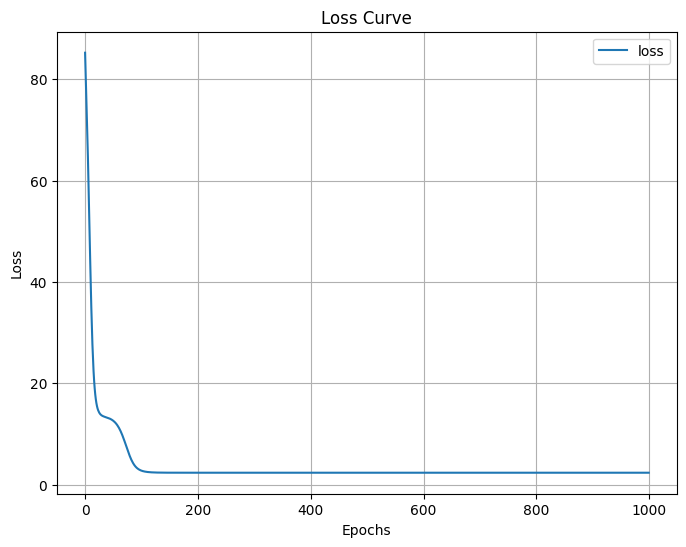

In [44]:
# 绘制损失曲线
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(loss_history, label="loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# 最终的近似矩阵
W_approx = A @ B

print(W_approx)

[[ 3.92499196  3.06584542  2.10616302  0.84487308]
 [ 1.80749375  2.16899061  2.27246474  1.60187065]
 [ 1.39233235  2.65559308  3.44471033  2.81139716]
 [-0.31000446  1.27213581  2.43876645  2.35886822]]


In [48]:
# 原始的矩阵 W

print(W)

[[4 3 2 1]
 [2 2 2 2]
 [1 3 4 2]
 [0 1 2 3]]
